# Support Vector Machine - Hard Margin Classification

## Define the functions

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function (hinge loss) and the objective function
def hinge_loss(w, b, X, y):
    return np.sum(np.maximum(0, 1 - y * (np.dot(X, w) + b)))

def objective_function(w, b, X, y, C=1):
    # Add regularization term (L2 regularization)
    return 0.5 * np.dot(w, w) + C * hinge_loss(w, b, X, y)

# Gradient of the objective function
def compute_gradients(w, b, X, y, C=1):
    n = len(X)
    
    # Initialize gradients
    grad_w = np.zeros_like(w)
    grad_b = 0

    # Loop over all points
    for i in range(n):
        margin = y[i] * (np.dot(X[i], w) + b)
        if margin < 1:
            grad_w -= C * y[i] * X[i]
            grad_b -= C * y[i]

    # Include the regularization term in the gradient
    grad_w += w  # L2 regularization gradient
    
    return grad_w, grad_b

# Gradient descent to optimize the SVM parameters
def svm_train(X, y, learning_rate=0.01, epochs=1000, C=1):
    # Initialize weights and bias
    w = np.zeros(X.shape[1])
    b = 0

    for epoch in range(epochs):
        # Compute gradients
        grad_w, grad_b = compute_gradients(w, b, X, y, C)
        
        # Update parameters
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b
        
        # Optionally print the progress
        if epoch % 100 == 0:
            loss = objective_function(w, b, X, y, C)
            print(f"Epoch {epoch}: Loss = {loss}")

    return w, b

# SVM prediction
def svm_predict(X, w, b):
    return np.sign(np.dot(X, w) + b)

## Generate synthetic data for the demo (two classes, linearly separable)

In [6]:
np.random.seed(0)
X_pos = np.random.randn(10, 2) + [2, 2]  # Positive class (+1)
X_neg = np.random.randn(10, 2) + [-2, -2]  # Negative class (-1)

X = np.vstack([X_pos, X_neg])
y = np.hstack([np.ones(10), -np.ones(10)])

## Train the SVM

In [8]:
w, b = svm_train(X, y, learning_rate=0.01, epochs=1000)

Epoch 0: Loss = 1.0475662745079621
Epoch 100: Loss = 0.2068582860856918
Epoch 200: Loss = 0.20142577106843876
Epoch 300: Loss = 0.19949383127827836
Epoch 400: Loss = 0.19406143755827263
Epoch 500: Loss = 0.19393222082295922
Epoch 600: Loss = 0.19634745410770918
Epoch 700: Loss = 0.2009626042079402
Epoch 800: Loss = 0.19616186259175317
Epoch 900: Loss = 0.19445746012357992


## Visualize the decision boundary

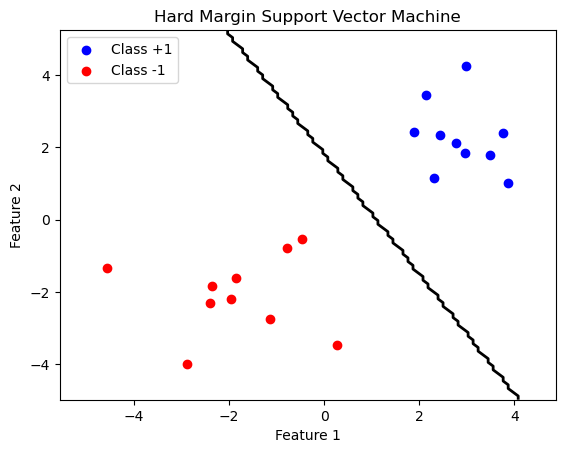

In [10]:
plt.scatter(X_pos[:, 0], X_pos[:, 1], color='b', label='Class +1')
plt.scatter(X_neg[:, 0], X_neg[:, 1], color='r', label='Class -1')

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = svm_predict(np.c_[xx.ravel(), yy.ravel()], w, b)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Hard Margin Support Vector Machine')
plt.show()